In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Flatten, Dense,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
x_train = (x_train - 0.0)/(255.0 - 0.0)
x_test = (x_test - 0.0)/(255.0 - 0.0)
x_train[0].min(),x_train[0].max()

(0.0, 1.0)

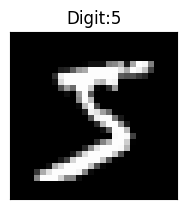

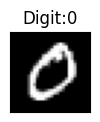

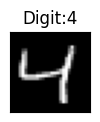

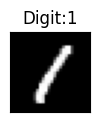

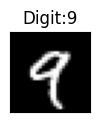

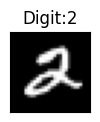

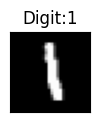

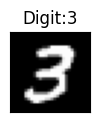

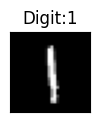

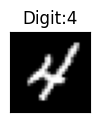

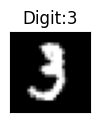

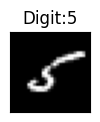

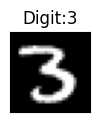

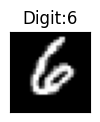

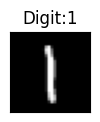

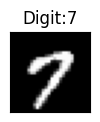

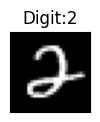

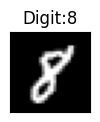

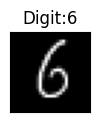

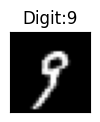

In [8]:
def plot_digit(image,digit,plt,i):
    plt.subplot(4,5,i+1)
    plt.imshow(image,cmap=plt.get_cmap('gray'))
    plt.title(f"Digit:{digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16,10))
for i in range (20):
    plot_digit(x_train[i],y_train[i],plt,i)
    plt.show()

In [9]:
x_train = x_train.reshape((x_train.shape+(1,)))
x_test = x_test.reshape((x_test.shape+(1,)))

In [10]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [12]:
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation ="relu"),
    Dense(10,activation="softmax")
])

In [13]:
from sklearn import metrics
optimizer=SGD(learning_rate=0.01,momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [14]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2451 - accuracy: 0.9257
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0844 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0517 - accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0355 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0271 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0199 - accuracy: 0.9943
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0143 - accuracy: 0.9958
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0112 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0075 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 20s 11m

1/1 [==============================] - 0s 66ms/step


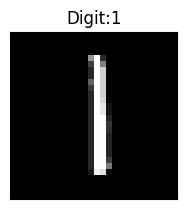

1/1 [==============================] - 0s 20ms/step


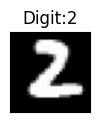

1/1 [==============================] - 0s 23ms/step


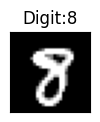

1/1 [==============================] - 0s 19ms/step


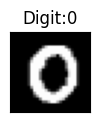

1/1 [==============================] - 0s 24ms/step


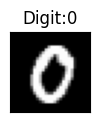

1/1 [==============================] - 0s 21ms/step


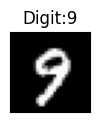

1/1 [==============================] - 0s 19ms/step


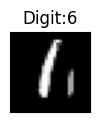

1/1 [==============================] - 0s 23ms/step


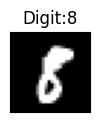

1/1 [==============================] - 0s 23ms/step


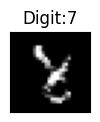

1/1 [==============================] - 0s 18ms/step


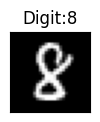

1/1 [==============================] - 0s 20ms/step


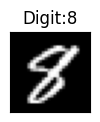

1/1 [==============================] - 0s 25ms/step


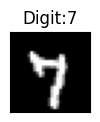

1/1 [==============================] - 0s 23ms/step


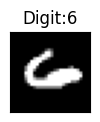

1/1 [==============================] - 0s 25ms/step


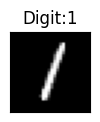

1/1 [==============================] - 0s 27ms/step


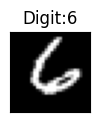

1/1 [==============================] - 0s 24ms/step


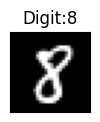

1/1 [==============================] - 0s 23ms/step


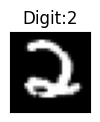

1/1 [==============================] - 0s 23ms/step


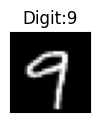

1/1 [==============================] - 0s 21ms/step


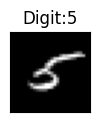

1/1 [==============================] - 0s 24ms/step


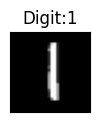

In [16]:
plt.figure(figsize=(16,10))
for i in range(20):
  image = random.choice(x_test).squeeze()
  digit=np.argmax(model.predict(image.reshape((1,28,28,1)))[0],axis=-1)
  plot_digit(image,digit,plt,i)
  plt.show()

In [17]:
predictions=np.argmax(model.predict(x_test),axis=-1)
accuracy_score(y_test,predictions)

313/313 [==============================] - 2s 6ms/step


0.9868

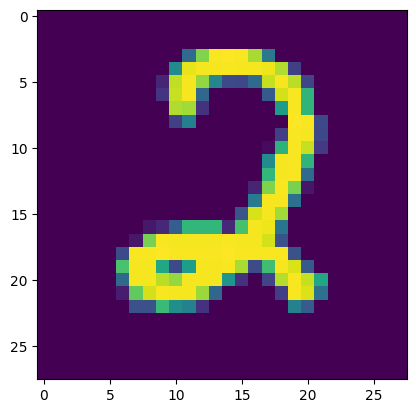

In [18]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [19]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is =%d "%np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 4ms/step
Handwritten number in the image is =2 


In [20]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0]) # test loss: 0.0296396646054
print('Test accuracy: ',score[1])

#the implemented CNN model is giving Loss = 0.04611021280288696 and
# accuracy : 0.9868000149726868 for test mnist dataset

Test loss: 0.04611021280288696
Test accuracy:  0.9868000149726868
